In [44]:
import pandas as pd
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import math
import operator

In [45]:
df = pd.read_csv("NCWIT-TrackingToolData-Scrubbed.csv")
df.head()

/usr/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Record#,CIP# Only,Major Program Name,Degree Level,NCWIT Participant,Institution,What degrees does your institution offer?,School Year,When do students typically declare their major?,"Enroll, Female: Avg. ACT Math Score (Enrl F)",...,Nonresident Alien (Min. M).1,Race/Ethnicity Unknown (Min. M).1,Nonresident Alien (Min. F).2,Race/Ethnicity Unknown (Min. F).2,Nonresident Alien (Min. M).2,Race/Ethnicity Unknown (Min. M).2,Nonresident Alien (Tot. F),Race/Ethnicity Unknown (Tot. F),Nonresident Alien (Tot. M),Race/Ethnicity Unknown (Tot. M)
0,1978,14.1000,Electrical Engineering,Bachelor's,"Extension Services, Academic Alliance",263,"Bachelor's, master's, and Ph.D. degrees",2013-2014,Upon Enrollment,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2034,14.1000,Electrical Engineering,Bachelor's,"Extension Services, Academic Alliance",263,"Bachelor's, master's, and Ph.D. degrees",2014-2015,Upon Enrollment,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1980,11.0103,Information Technology,Bachelor's,"Extension Services, Academic Alliance",263,"Bachelor's, master's, and Ph.D. degrees",2013-2014,Upon Enrollment,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2035,11.0103,Information Technology,Bachelor's,"Extension Services, Academic Alliance",263,"Bachelor's, master's, and Ph.D. degrees",2014-2015,Upon Enrollment,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1981,14.0903,Software Engineering,Bachelor's,"Extension Services, Academic Alliance",263,"Bachelor's, master's, and Ph.D. degrees",2013-2014,Upon Enrollment,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
numRecs = len(df)
numRecs

2913

In [47]:
list(set(df["CIP# Only"]))
#should return a list of strings and floats?

['14.0700',
 '14.0903',
 '12.0100',
 '11.0104',
 11.07,
 11.0103,
 11.0703,
 14.09,
 '52.1200',
 '11.0199',
 '14.0000',
 14.02,
 11.0702,
 '27.0100',
 14.19,
 '11.0900',
 14.1,
 '14.1000',
 '11.0103',
 '11.1003',
 '27.0300',
 27.03,
 '26.1100',
 '11.0702',
 '11.1002',
 '14.4500',
 '14.2700',
 '11.0500',
 52.12,
 11.05,
 '?',
 11.0199,
 11.01,
 11.1,
 11.0104,
 '14.0800',
 11.1006,
 11.1001,
 11.02,
 11.08,
 '15.0600',
 14.27,
 '11.0100',
 '15.0303',
 14.08,
 14.0903,
 15.0,
 '11.0802',
 '15.0000',
 14.01,
 '15.0100',
 '11.0800',
 '16.0100',
 '14.0100',
 '11.0200',
 '11.0400',
 '11.0700',
 '11.1006',
 '11.1000',
 '14.3600',
 '14.1800',
 '14.0200',
 '13.0100',
 '14.0900',
 '11.0703',
 '14.1900',
 '11.9900',
 '11.0801']

In [48]:
#Clean the "CIP# Only" column to be only floats to the 4th decimal place 
df = df[df["CIP# Only"] != '?']

for i,row in df.iterrows():
    df.set_value(i,"CIP# Only",format(float(row["CIP# Only"]),'0.4f'))
    
df["CIP# Only"]

/usr/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """


0       14.1000
1       14.1000
2       11.0103
3       11.0103
4       14.0903
5       14.0903
6       11.0700
7       11.0700
8       11.0700
9       11.0700
10      11.0700
11      11.0700
12      11.0700
13      11.0700
14      14.2700
15      14.2700
16      14.2700
17      14.2700
18      14.2700
19      14.2700
20      14.2700
21      14.2700
22      14.1000
23      14.1000
24      14.1000
25      14.1000
26      14.1000
27      14.1000
28      14.1000
29      14.1000
         ...   
2883    11.0700
2884    11.0700
2885    11.0700
2886    11.0700
2887    11.0700
2888    11.0700
2889    11.0700
2890    11.0700
2891    11.0700
2892    11.0700
2893    11.0700
2894    11.0700
2895    14.0900
2896    14.0900
2897    14.0900
2898    14.0900
2899    14.0900
2900    14.0900
2901    11.0500
2902    11.0500
2903    11.0500
2904    11.0500
2905    11.0500
2906    11.0500
2907    11.0700
2908    11.0700
2909    11.0700
2910    11.0700
2911    11.0700
2912    11.0700
Name: CIP# Only, Length:

In [49]:
cipCounter = Counter(df["CIP# Only"])
l = sorted(cipCounter.items(), key=operator.itemgetter(1), reverse=True)
print(l)
x = list()
y = list()
for i in range(0,len(l)):
        x.append(l[i][0])
        y.append(l[i][1])

[('11.0700', 1071), ('14.0900', 232), ('11.0500', 171), ('14.1000', 169), ('11.0103', 164), ('11.0199', 118), ('11.0100', 105), ('14.1900', 98), ('11.0702', 95), ('11.1000', 85), ('11.0703', 84), ('52.1200', 81), ('14.0903', 58), ('11.0400', 57), ('11.0800', 41), ('11.0104', 34), ('15.0000', 26), ('14.0800', 24), ('26.1100', 17), ('11.0801', 16), ('14.2700', 14), ('11.0900', 14), ('11.0200', 14), ('11.9900', 13), ('14.0200', 11), ('15.0600', 10), ('11.1006', 9), ('14.0100', 9), ('11.1003', 9), ('27.0100', 8), ('11.0802', 8), ('14.0700', 7), ('15.0303', 6), ('11.1001', 6), ('27.0300', 5), ('14.0000', 4), ('14.4500', 4), ('14.1800', 4), ('11.1002', 4), ('12.0100', 1), ('13.0100', 1), ('15.0100', 1), ('16.0100', 1), ('14.3600', 1)]


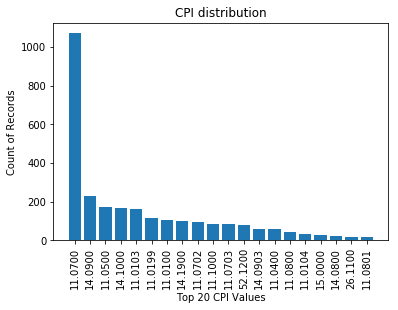

In [50]:
yVals = range(0,len(l))
plt.title("CPI distribution")
plt.bar(yVals[:20], y[:20])
plt.xticks(yVals[:20], x[:20],rotation=90)
plt.ylabel("Count of Records")
plt.xlabel("Top 20 CPI Values")
plt.show()

In [51]:
list(df.columns.values)

['Record#',
 'CIP# Only',
 'Major Program Name',
 'Degree Level',
 'NCWIT Participant',
 'Institution',
 'What degrees does your institution offer?',
 'School Year',
 'When do students typically declare their major?',
 'Enroll, Female: Avg. ACT Math Score (Enrl F)',
 'Enroll, Female: Asian (Enrl F)',
 'Enroll, Female: Average Age (Enrl F)',
 'Enroll, Female: Average HS GPA (Enrl F)',
 'Enroll, Female: Avg. SAT Math Score (Enrl F)',
 'Enroll, Female: Black/African American (Enrl F)',
 'Enroll, Female: Hispanics of any race (Enrl F)',
 'Enroll, Female: American Indian/Alaska Native (Enrl F)',
 'Enroll, Female: Native Hawaiian/Other Pacific Islander (Enrl F)',
 'Enroll, Female: Two or more races (Enrl F)',
 'Enroll, Female: New Enrollments (Enrl F)',
 'Enroll, Female: Transfer Students (Enrl F)',
 'Enroll, Female: US Citizens (Enrl F)',
 'Enroll, Female: White (Enrl F)',
 'Enroll, Male: Avg. ACT Math Score (Enrl M)',
 'Enroll, Male: Asian (Enrl M)',
 'Enroll, Male: Average Age (Enrl M)',


In [52]:
#Look at the institutions with values not NaN (NaNaN?)
institutes = Counter(df["Institution"])
whenMajor = Counter(df["When do students typically declare their major?"])
schoolYear = Counter(df["School Year"])
print(institutes, "\n")
print(whenMajor, "\n")
print(schoolYear, "\n")

Counter({110: 87, 270: 63, 13: 62, 216: 54, 487: 54, 424: 54, 114: 48, 262: 47, 320: 47, 75: 44, 373: 42, 72: 42, 287: 42, 233: 40, 82: 38, 194: 37, 144: 36, 330: 36, 64: 35, 499: 34, 295: 33, 189: 32, 453: 32, 117: 31, 319: 31, 435: 30, 85: 27, 47: 27, 182: 27, 157: 27, 32: 26, 351: 26, 369: 26, 430: 26, 367: 25, 469: 25, 395: 24, 379: 24, 179: 24, 291: 24, 361: 24, 299: 24, 146: 23, 368: 23, 236: 22, 88: 22, 422: 22, 40: 21, 302: 21, 158: 21, 388: 20, 97: 20, 205: 18, 489: 18, 238: 18, 65: 18, 381: 18, 115: 17, 109: 17, 143: 17, 21: 16, 397: 16, 54: 16, 224: 16, 345: 16, 250: 16, 25: 16, 133: 16, 337: 16, 26: 16, 497: 16, 37: 16, 200: 15, 9: 15, 333: 14, 346: 14, 324: 14, 217: 13, 68: 13, 412: 13, 112: 12, 160: 12, 475: 12, 392: 12, 41: 12, 448: 12, 121: 12, 490: 12, 336: 12, 486: 12, 411: 11, 155: 11, 128: 11, 248: 11, 334: 10, 438: 10, 249: 10, 4: 10, 258: 10, 232: 10, 223: 9, 456: 9, 371: 9, 417: 9, 91: 9, 331: 9, 437: 9, 206: 9, 131: 9, 500: 9, 176: 9, 243: 8, 364: 8, 312: 8, 6: 

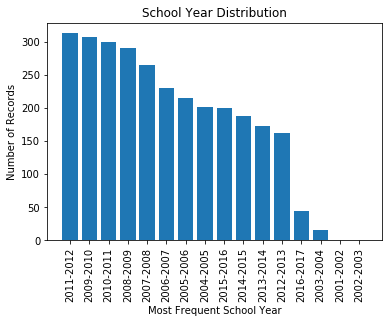

In [53]:
l = sorted(schoolYear.items(), key=operator.itemgetter(1), reverse=True)
yVals = range(0, len(l))
x = list()
y = list()
for i in range(0, len(l)):
    x.append(l[i][0])
    y.append(l[i][1])
    
plt.title("School Year Distribution")
plt.bar(yVals[:20], y[:20])
plt.xticks(yVals[:20], x[:20],rotation=90)
plt.ylabel("Number of Records")
plt.xlabel("Most Frequent School Year")
plt.show()

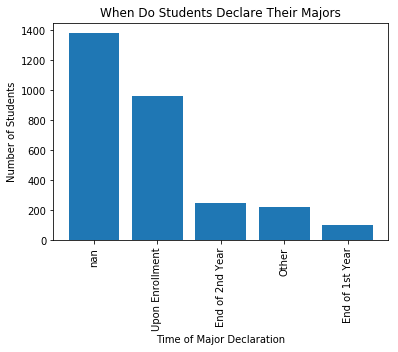

In [54]:
l = sorted(whenMajor.items(), key=operator.itemgetter(1), reverse=True)
yVals = range(0, len(l))
x = list()
y = list()
for i in yVals:
    x.append(l[i][0])
    y.append(l[i][1])
    
plt.title("When Do Students Declare Their Majors")
plt.bar(yVals[:20], y[:20])
plt.xticks(yVals[:20], x[:20],rotation=90)
plt.ylabel("Number of Students")
plt.xlabel("Time of Major Declaration")
plt.show()

In [60]:
 #Export the clean(ish) data to a file
df.to_csv("cleanData.csv")

In [61]:
cleanDF = pd.read_csv("cleanData.csv")
cleanDF.head()

,Unnamed: 0,Record#,CIP# Only,Major Program Name,Degree Level,NCWIT Participant,Institution,What degrees does your institution offer?,School Year,When do students typically declare their major?,...,Nonresident Alien (Min. M).1,Race/Ethnicity Unknown (Min. M).1,Nonresident Alien (Min. F).2,Race/Ethnicity Unknown (Min. F).2,Nonresident Alien (Min. M).2,Race/Ethnicity Unknown (Min. M).2,Nonresident Alien (Tot. F),Race/Ethnicity Unknown (Tot. F),Nonresident Alien (Tot. M),Race/Ethnicity Unknown (Tot. M)
0,0,1978,14.1000,Electrical Engineering,Bachelor's,"Extension Services, Academic Alliance",263,"Bachelor's, master's, and Ph.D. degrees",2013-2014,Upon Enrollment,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2034,14.1000,Electrical Engineering,Bachelor's,"Extension Services, Academic Alliance",263,"Bachelor's, master's, and Ph.D. degrees",2014-2015,Upon Enrollment,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1980,11.0103,Information Technology,Bachelor's,"Extension Services, Academic Alliance",263,"Bachelor's, master's, and Ph.D. degrees",2013-2014,Upon Enrollment,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2035,11.0103,Information Technology,Bachelor's,"Extension Services, Academic Alliance",263,"Bachelor's, master's, and Ph.D. degrees",2014-2015,Upon Enrollment,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1981,14.0903,Software Engineering,Bachelor's,"Extension Services, Academic Alliance",263,"Bachelor's, master's, and Ph.D. degrees",2013-2014,Upon Enrollment,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
